In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank1.csv')
data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [3]:
# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  month  duration

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6bc3746639838afceb07abd2307ae6168e7da439dc6a37bae8fb260c6c46cec3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [6]:
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the XGB classifier
xgb_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=[str(cls) for cls in y_train.unique()],
                                                   mode='classification')

# Define function to predict using the XGB classifier model
predict_fn = lambda x: xgb_classifier.predict_proba(x)

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)


Actual Value: 1
Predicted Class: 1


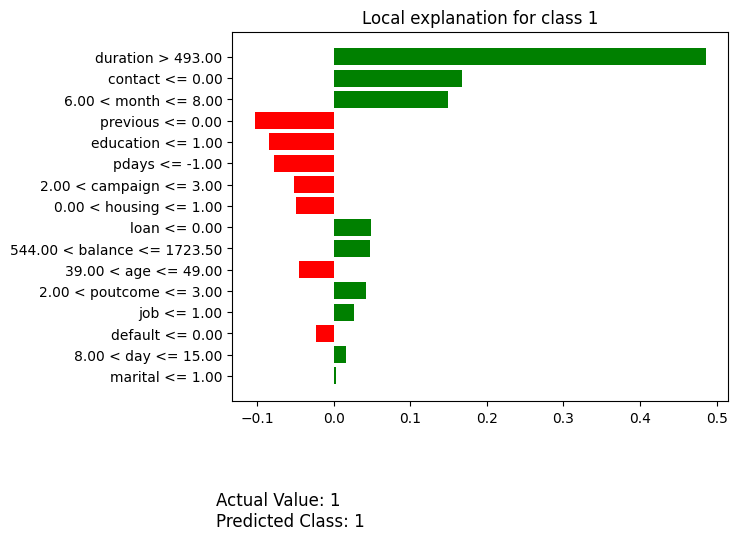

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=y_train.unique(),
                                                   mode='classification')

# Define function to predict using the XGB classifier model
predict_fn = lambda x: xgb_classifier.predict_proba(x)

# Select an instance for which you want to explain predictions
# For example, let's say the instance is the first instance in the validation set
instance_idx = 0  # Change this index according to your choice

# Get the actual and predicted values for the selected instance
actual_value = y_val.iloc[instance_idx]
predicted_value = xgb_classifier.predict(X_val.values[[instance_idx]]).squeeze()

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_val.values[instance_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
fig = exp.as_pyplot_figure()

# Save the plot along with actual and predicted values in a PDF file
with PdfPages('explanation_plot_classification_xgb.pdf') as pdf:
    pdf.savefig(fig)
    plt.text(0.1, -0.15, f"Actual Value: {actual_value}\nPredicted Class: {predicted_value}", transform=fig.transFigure, fontsize=12)

# Print actual and predicted values
print("Actual Value:", actual_value)
print("Predicted Class:", predicted_value)
